# Task 9

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Find an optimal decision tree for the set `airline_passenger_satisfaction.csv` by simplifying the model.

## Preparing the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving airline_passenger_satisfaction.csv to airline_passenger_satisfaction (1).csv


In [ ]:
df = pd.read_csv('/content/airline_passenger_satisfaction.csv')
df

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


Improve the set:
 - remove observations with outliers.
 - remove variables with zero correlation with the variable: `satisfaction`

### Null values

First, we remove `NaN` values in the data set

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Gender,0
customer_type,0
age,0
type_of_travel,0
customer_class,0
flight_distance,0
inflight_wifi_service,0
departure_arrival_time_convenient,0
ease_of_online_booking,0


In [ ]:
# with this next command we remove all rows with missing values in the 'arrival_delay_in_minutes' column
df.dropna(subset=['arrival_delay_in_minutes'], inplace=True)
#df.dropna(inplace=True)

In [ ]:
df.shape

(129487, 24)

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.shape

(129487, 23)

### Outliers

Let's remove the observations with outliers

In [ ]:
outliers = set()

for col in df.select_dtypes(include=['number']).columns:
  q1 = np.nanquantile(df[col], 0.25)
  q3 = np.nanquantile(df[col], 0.75)
  iqr = q3 - q1

  upper_lim = q3 + (1.5 * iqr)
  lower_lim = q1 - (1.5 * iqr)

  outliers.update(df[(df[col]>upper_lim) | (df[col]<lower_lim)].index)

print(len(outliers))

36071


In [ ]:
df.drop(outliers, inplace=True)

In [ ]:
df.shape

(93416, 23)

### Encoding

Now we have to transform the "text" variables into a numerical form. For that, we use `LabelEncoder`

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include=['object']).columns:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])
    l = list(le.classes_)

df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,0,0,26,1,1,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0
6,1,0,47,1,1,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,0


### Correlation

Finally, we remove the variables with zero correlation with the variable `satisfaction`

Text(0.5, 1.0, 'Data correlations')

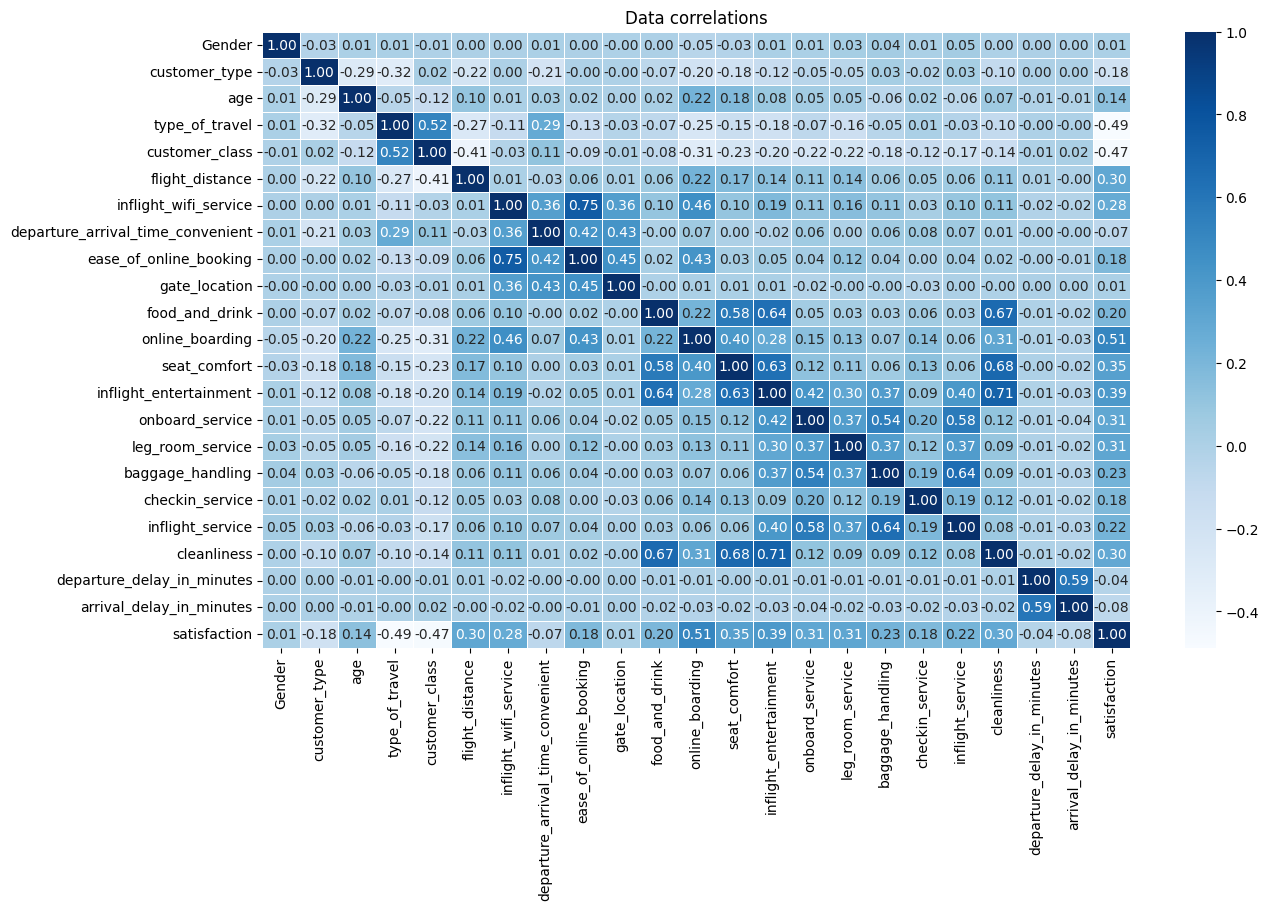

In [ ]:
# Compute correlation matrix
correlation=df.corr()

# Plot heatmap for visualization
plt.figure(figsize=(14,8))
sns.heatmap(correlation, annot=True, fmt='.2f', annot_kws={'size': 10}, linewidths=0.5, cmap='Blues')
plt.title("Data correlations")

In [ ]:
# Identify columns with near-zero correlation with 'satisfaction'
threshold = 0.01
low_correlation_vars = correlation['satisfaction'][correlation['satisfaction'].abs() < threshold].index.tolist()

In [ ]:
# Print the variables to be removed
print(f"Variables with near-zero correlation to 'satisfaction': {low_correlation_vars}")

Variables with near-zero correlation to 'satisfaction': ['gate_location']


In [ ]:
# Drop these columns from the DataFrame
df.drop(columns=low_correlation_vars, inplace=True)

## Train/Test

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [ ]:
print(y.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))

satisfaction
0    0.532168
1    0.467832
Name: proportion, dtype: float64
satisfaction
0    0.532168
1    0.467832
Name: proportion, dtype: float64
satisfaction
0    0.532168
1    0.467832
Name: proportion, dtype: float64


## Optimal model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import RocCurveDisplay, cohen_kappa_score

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
path=model.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']
alphas

array([0.00000000e+00, 6.11088958e-06, 7.02059106e-06, ...,
       2.83962427e-02, 7.12560700e-02, 1.72971481e-01])

In [ ]:
len(alphas)

1229

In [ ]:
new_alphas=alphas[0:len(alphas):50]
len(new_alphas)

25

In [ ]:
acc_train, acc_test = [], []

for i in new_alphas:
  t=DecisionTreeClassifier(ccp_alpha=i)
  t.fit(X_train,y_train)
  y_train_pred_t=t.predict(X_train)
  y_test_pred_t=t.predict(X_test)
  acc_train.append(accuracy_score(y_train,y_train_pred_t))
  acc_test.append(accuracy_score(y_test,y_test_pred_t))

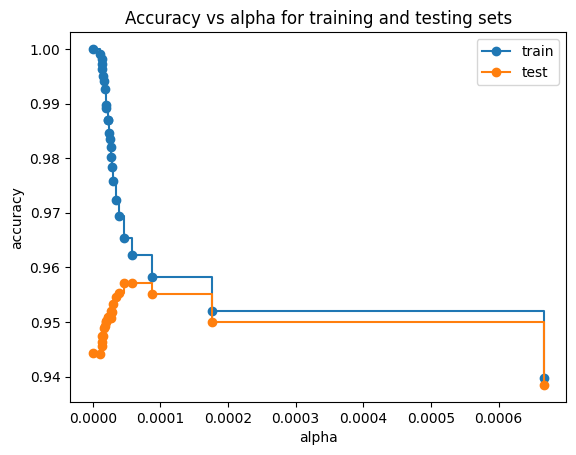

In [ ]:
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(new_alphas, acc_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(new_alphas, acc_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The optimal value is when the two lines are closer. In this example, any value between $[0.0002,0.0006]$ would be appropiate

In [ ]:
best_alpha=0.0003 # for example

In [ ]:
best=DecisionTreeClassifier(ccp_alpha=best_alpha)
best.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0003)

In [ ]:
best.get_params()

{'ccp_alpha': 0.0003,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

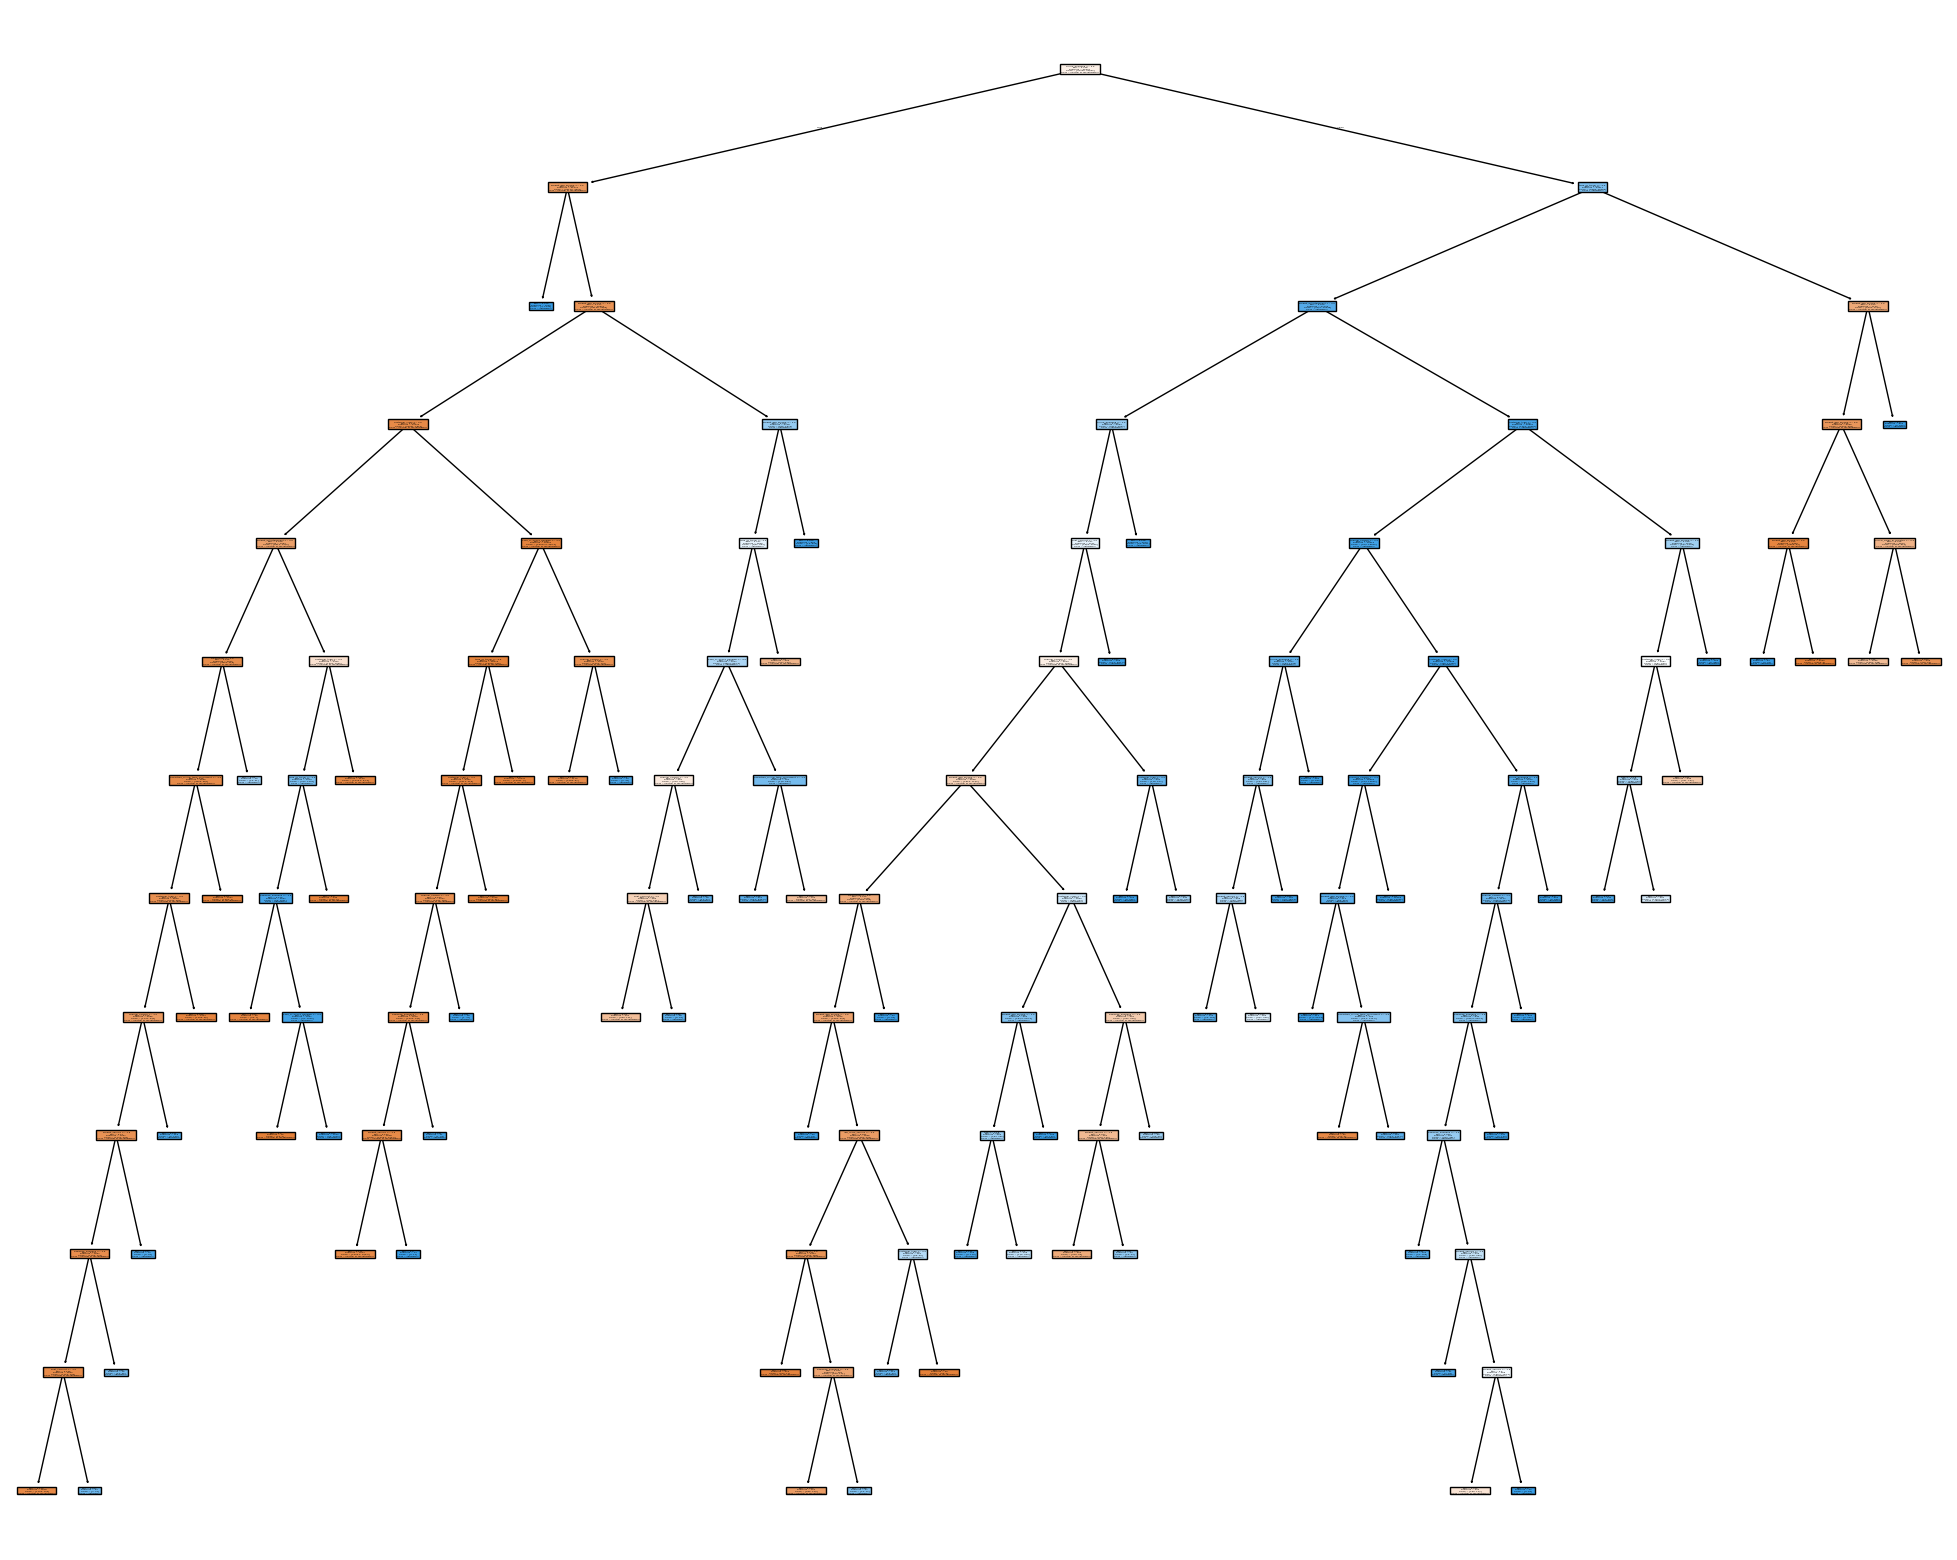

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best,
                   feature_names=df.columns,
                   class_names = ['neutral or dissatisfied 0', 'satisfied 1'],
                   filled=True)

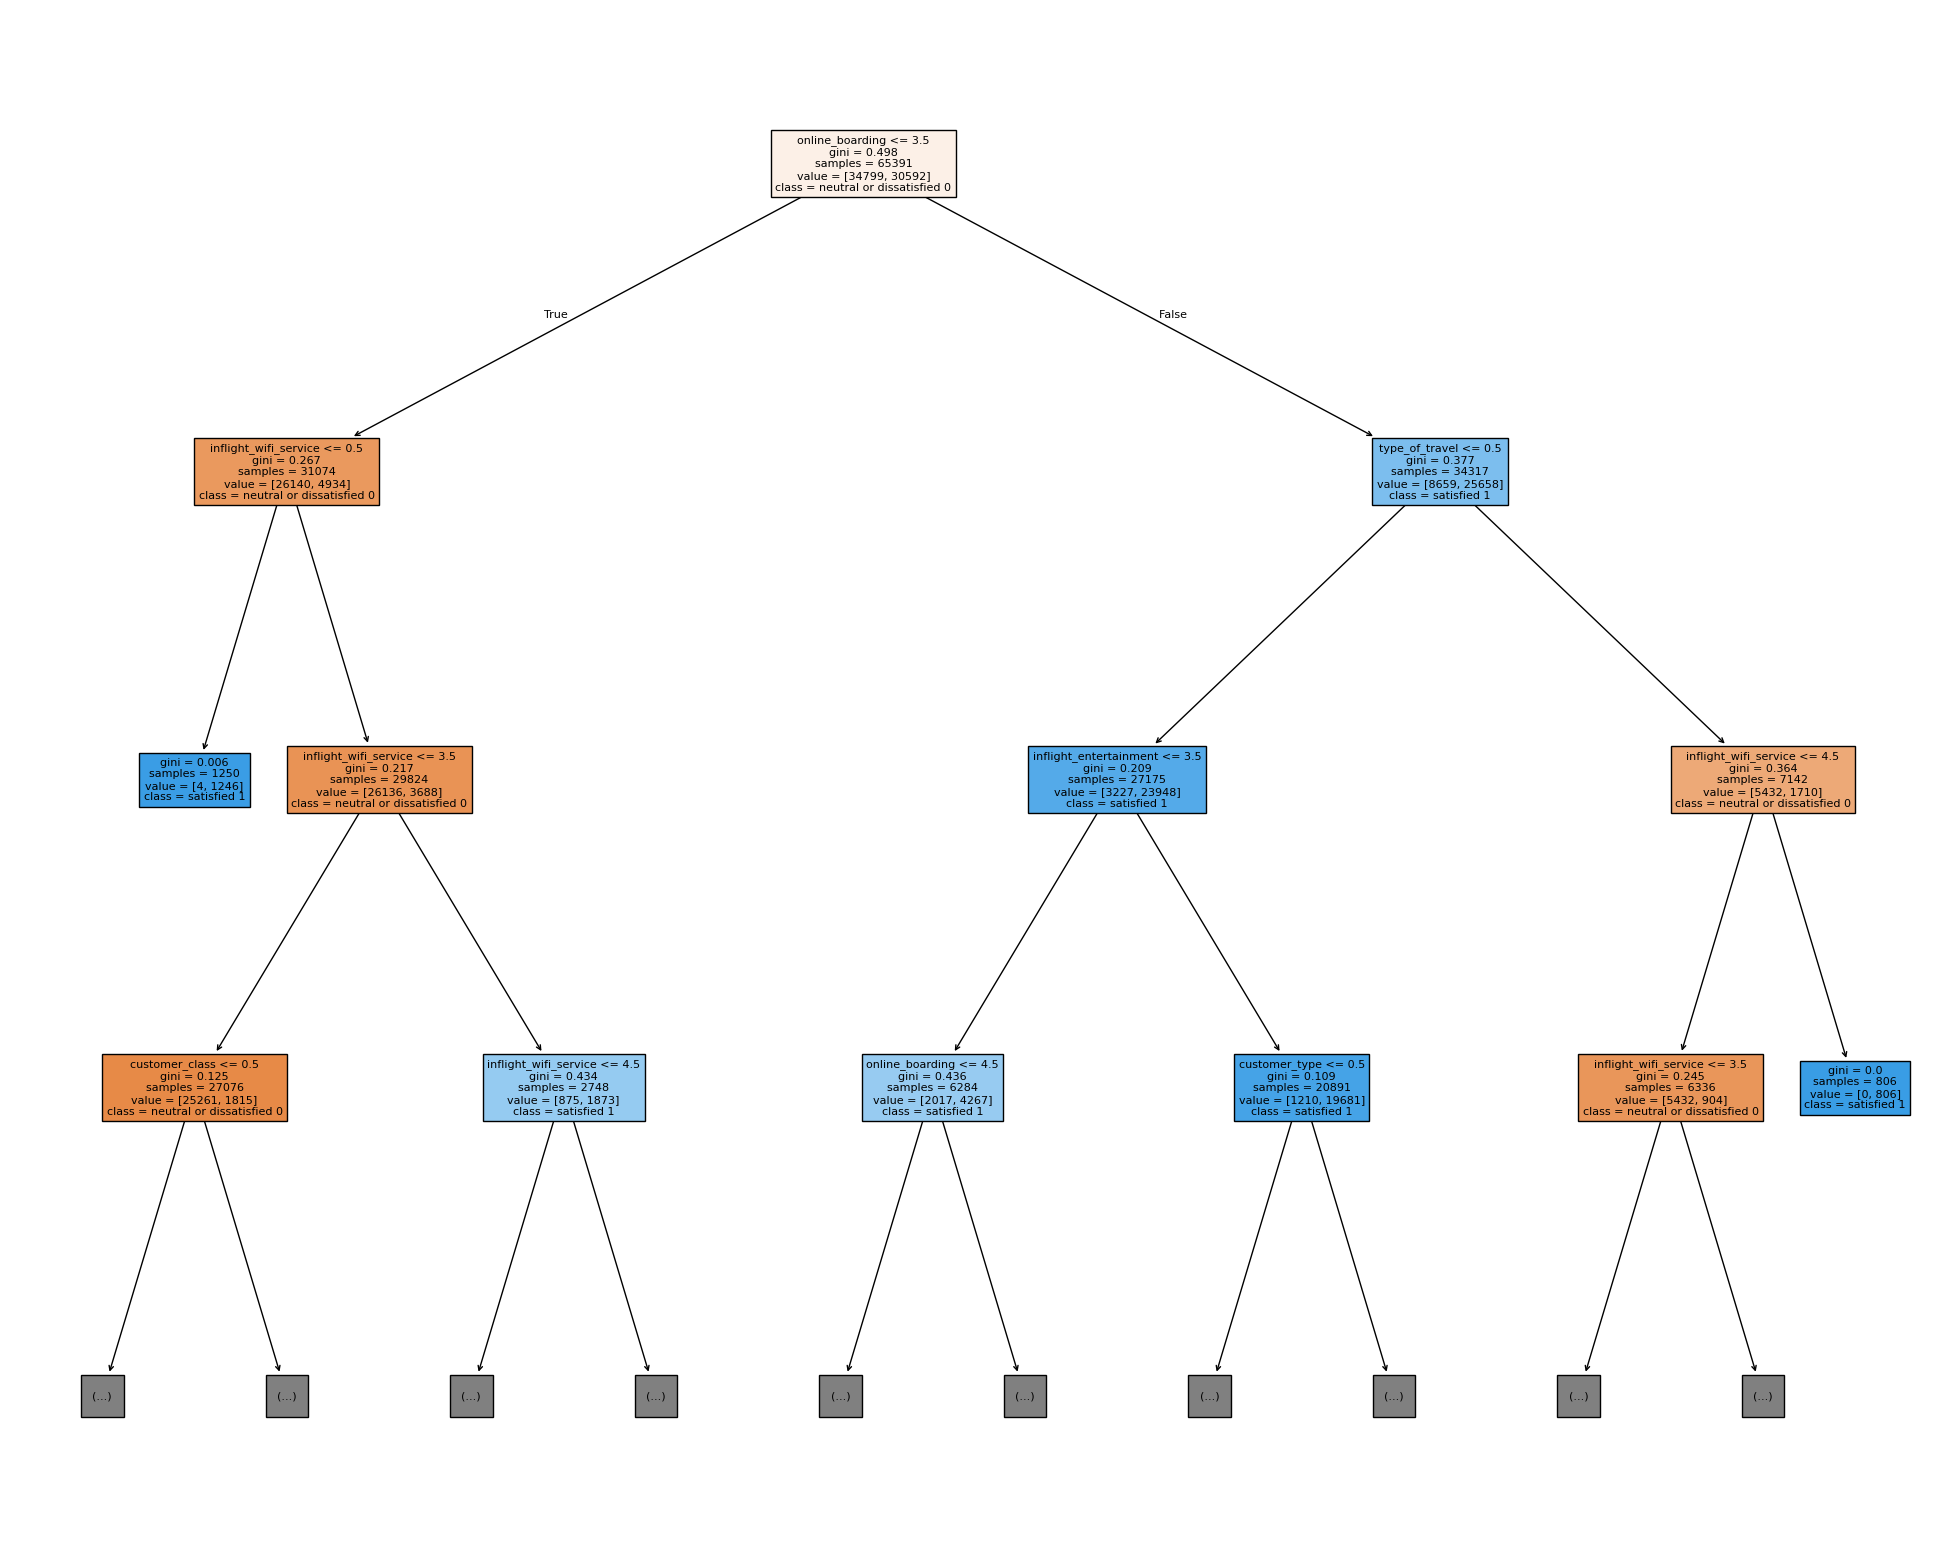

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best,
                   feature_names=df.columns,
                   class_names = ['neutral or dissatisfied 0', 'satisfied 1'],
                   filled=True,
                   max_depth=3)

### Prediction

In [ ]:
y_pred=best.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

### Evaluation

In [ ]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

[[14321   593]
 [  899 12212]]
Accuracy Score:  0.9467618198037466


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14914
           1       0.95      0.93      0.94     13111

    accuracy                           0.95     28025
   macro avg       0.95      0.95      0.95     28025
weighted avg       0.95      0.95      0.95     28025



In [ ]:
print('Cohen Kappa Score: ', cohen_kappa_score(y_test, y_pred))

Cohen Kappa Score:  0.89293004597243


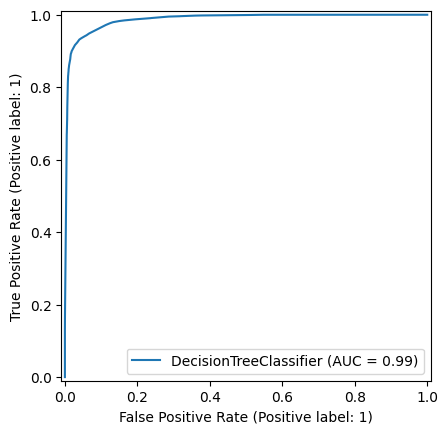

In [ ]:
RocCurveDisplay.from_estimator(best, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


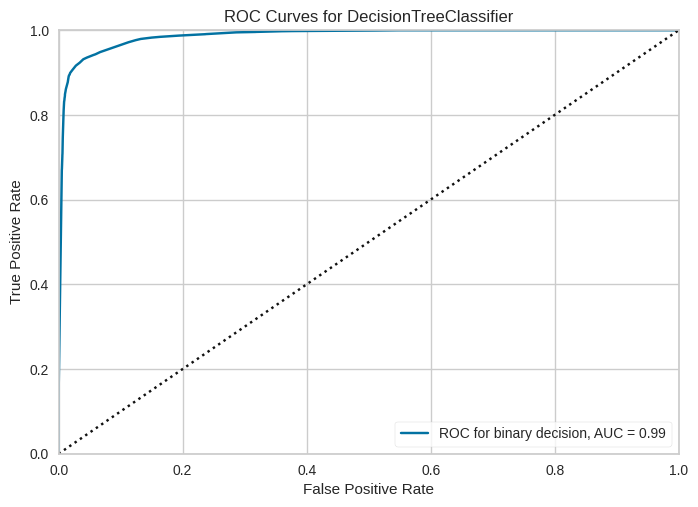

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(best, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

Finally, let's show this is an optimal model

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=best,  # the estimator is our model (m_01)
                               X=X_train,       # the feature matrix for training
                               y=y_train,       # the target vector for training
                               train_sizes=np.linspace(0.1, 1.0, 10), # varying training sizes
                               cv=10,           #cross validation
                               n_jobs=-1)       # use all CPU cores for parallel computation

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

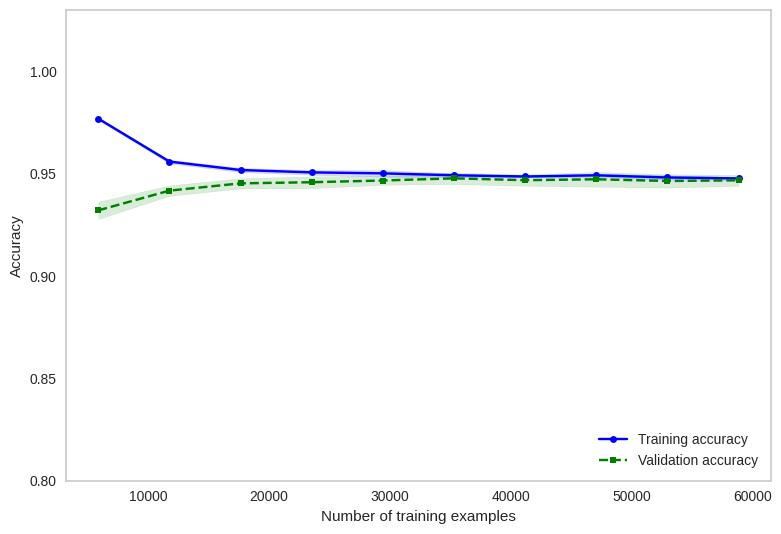

In [ ]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

This is an optimal model. Both sets are around the perfect accuracy (96%), tending to this desired accuracy. With this analysis we can say that for this data this is the best model